In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import importlib
import utils
import simulatedannealing
from main_cd import main_cd as main
importlib.reload(utils)
importlib.reload(simulatedannealing)
from utils import *


CLUSTER RESULTS - 28.09.2023

In [107]:
import pickle

# surrogate optimization and simulated annealing
with open('../surdata/tree35_iter-20_objective-meanopt10-10-2023_11:50.pkl', 'rb') as file: 
    # Load the object from the file
    loaded_data = pickle.load(file)
model, time, refmodel, xSA, ySA, timeSA = loaded_data

In [108]:
# bandit optimization
with open('../surdata/Ax_tree35_iter-120_objective-meanopt10-27-2023_16:13.pkl', 'rb') as file: 
    # Load the object from the file
    ax_data = pickle.load(file)

In [109]:
np.mean(model.y[-1])

3.247015610651974

In [110]:
-ySA[-1]

3.1404958677685952

In [111]:
ax_experiment = ax_data[0]
ax_experiment.get_trials_data_frame().iloc[-1]

trial_index                119
arm_name                 119_0
trial_status         COMPLETED
generation_method         GPEI
mean                  2.762167
M                            3
qbits_per_channel           12
cutoff                    10.0
q_swap                0.684047
p_cons                     0.2
Name: 119, dtype: object

Ax

In [42]:
ax_data

[AxClient(experiment=Experiment(simulation_test_experiment)),
 575.6018500328064,
 {'A': array([[0., 1., 1., 1., 0., 0., 1., 0., 0.],
         [1., 0., 1., 0., 1., 0., 0., 1., 0.],
         [1., 1., 0., 0., 0., 1., 0., 0., 1.],
         [1., 0., 0., 0., 1., 1., 1., 0., 0.],
         [0., 1., 0., 1., 0., 1., 0., 1., 0.],
         [0., 0., 1., 1., 1., 0., 0., 0., 1.],
         [1., 0., 0., 1., 0., 0., 0., 1., 1.],
         [0., 1., 0., 0., 1., 0., 1., 0., 1.],
         [0., 0., 1., 0., 0., 1., 1., 1., 0.]]),
  'protocol': 'srs',
  'p_gen': 0.9,
  'p_swap': 1,
  'return_data': 'avg',
  'progress_bar': None,
  'total_time': 300,
  'N_samples': 10}]

In [43]:
ax_experiment = ax_data[0]


In [44]:
ax_experiment

AxClient(experiment=Experiment(simulation_test_experiment))

In [36]:
df_ax_results = ax_experiment.get_trials_data_frame().iloc[:, 4:11]
df_ax_results['node_mean'] = df_ax_results.apply(np.mean, axis=1)

In [45]:
ax_experiment.get_trials_data_frame()['mean']

0      5.851852
1      4.246914
2      4.617284
3      5.913580
4      5.901235
         ...   
115    6.345679
116    6.950617
117    6.666667
118    6.234568
119    6.641975
Name: mean, Length: 120, dtype: float64

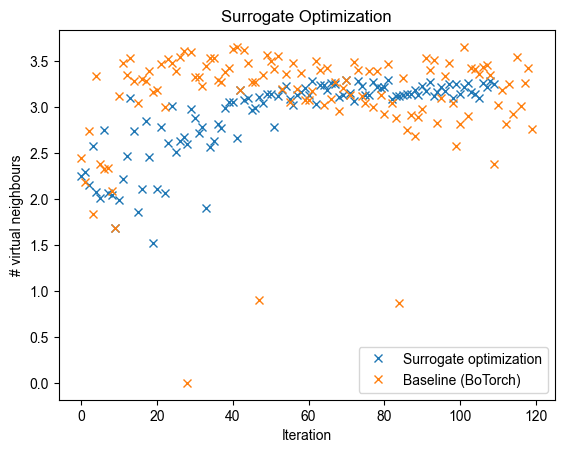

In [116]:
#fig = plt.figure(figsize=(20,10))
plt.title('Surrogate Optimization')
plt.plot([np.mean(y_i) for y_i in np.array(model.y)], 'x', label='Surrogate optimization')
#plt.plot([np.mean(y_i) for y_i in np.array(ySA)*-1], 'x', label='Baseline (simulated annealing)')
plt.plot(ax_experiment.get_trials_data_frame()['mean'], 'x', label='Baseline (BoTorch)')
#plt.plot([np.mean(np.array(y_i)) for y_i in refmodel.y],'x', label='Random evaluations')
plt.ylabel('# virtual neighbours')
plt.xlabel('Iteration')
plt.legend()

In [28]:
ax_experiment.get()

,trial_index,arm_name,trial_status,generation_method,mean,M,qbits_per_channel,cutoff,q_swap,p_cons
0,0,0_0,COMPLETED,Sobol,2.448118,5,3,6.957043,0.972659,0.107974
1,1,1_0,COMPLETED,Sobol,2.191001,5,50,3.687072,0.195957,0.056803
2,2,2_0,COMPLETED,Sobol,2.743802,4,37,6.783028,0.827821,0.194770
3,3,3_0,COMPLETED,Sobol,1.836547,2,22,1.234270,0.494645,0.163173
4,4,4_0,COMPLETED,Sobol,3.340680,8,29,9.946476,0.879804,0.069523
...,...,...,...,...,...,...,...,...,...,...
115,115,115_0,COMPLETED,GPEI,3.543618,9,43,9.842401,1.000000,0.028671
116,116,116_0,COMPLETED,GPEI,3.017447,6,21,6.879380,0.783876,0.065972
117,117,117_0,COMPLETED,GPEI,3.264463,8,33,8.767982,0.840266,0.055270
118,118,118_0,COMPLETED,GPEI,3.426997,6,37,10.000000,1.000000,0.074457


In [30]:
ax_experiment.get_best_trial()

/opt/homebrew/Caskroom/miniforge/base/envs/qnetsur/lib/python3.9/site-packages/ax/utils/stats/model_fit_stats.py:132: RuntimeWarning: divide by zero encountered in divide
  return float(np.mean(1.96 * 2 * se_pred / np.abs(y_obs)))
/opt/homebrew/Caskroom/miniforge/base/envs/qnetsur/lib/python3.9/site-packages/ax/utils/stats/model_fit_stats.py:143: RuntimeWarning: divide by zero encountered in divide
  return float(np.mean(np.abs((y_pred - y_obs) / y_obs)))
/opt/homebrew/Caskroom/miniforge/base/envs/qnetsur/lib/python3.9/site-packages/ax/utils/stats/model_fit_stats.py:150: RuntimeWarning: divide by zero encountered in scalar divide
  return float((np.max(y_obs) - min_y_obs) / min_y_obs)


(119,
 {'M': 8,
  'qbits_per_channel': 39,
  'cutoff': 8.818591914672425,
  'q_swap': 1.0,
  'p_cons': 0.01},
 ({'mean': 3.455816937480411}, {'mean': {'mean': 0.027636438499553682}}))

SURROGATE TEST

In [255]:
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

a = -5
b = 5
n=100

res = []

dim = 5
fun = lambda row: -sum([row[i]**2 for i in range(dim)])

def get_neighbour(row,count): 
    f = (1-np.log(1+count/n))**4
    return np.array([np.random.normal(row[i], scale=(np.sqrt(b-a)*f)) for i in range(dim)])

df = pd.DataFrame((b-a)*np.random.sample((1000,dim))+a)
for i in range(n):
    model = SVR()
    target = df.apply(fun, axis=1)
    model.fit(df,target)
    df_add = pd.DataFrame.from_records(df.iloc[np.argsort(target)[-20:].values].apply(get_neighbour, args=(i,), axis=1).to_numpy())
    y = model.predict(df_add)
    y = np.concatenate([target,y])
    index = y.argmax()
    #print(i)
    
    
    df = pd.concat([df, df_add], axis=0, ignore_index=True)
    res.append(df.iloc[index].to_frame().apply(fun)) 

-0.0009051172038535393


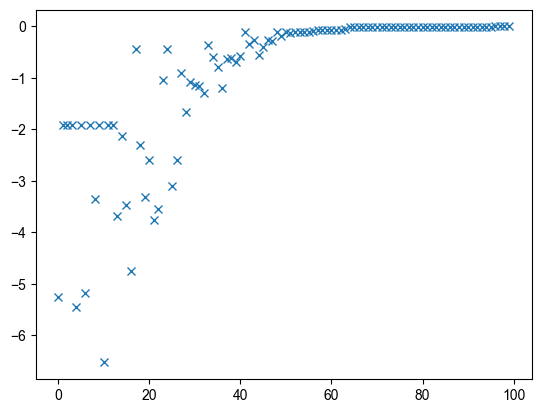

In [256]:
plt.plot(res, 'x')
print(np.max(res))

In [302]:
from scipy.optimize import minimize
import numpy as np

def cosmixture(**kwargs):
    a = kwargs.get('a', 0)
    b = kwargs.get('b', 0)
    c = kwargs.get('c', 0)
    return -(a * np.cos(b) + c)

# Create a function that takes a 1-D array and converts it to **kwargs
def objective_function(params):
    kwargs = {'a': params[0], 'b': params[1], 'c': params[2]}
    return cosmixture(**kwargs)

# Initial guess for parameters as a 1-D array
initial_guess = [1, 1, 1]

# Perform the optimization
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

# Extract the optimized parameters
optimized_params = result.x

In [18]:
import pickle

with open('../surdata/scipy_vs_simanneal.pkl', 'rb') as file: # ../surdata/tree23_iter-10_objective-meanopt10-03-2023_18:04.pkl
    # Load the object from the file
    loaded_data = pickle.load(file)

In [24]:
loaded_data[0][0][1][-1]

[71.86763978750275,
 42.580355501571766,
 54.41926217369501,
 15.838702433143798,
 12.928220368330127,
 1.14104508600452]